In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score as CVS
from sklearn.metrics import mean_squared_error as MSE
import numpy.random as rand
import scipy.stats as stats 
from sklearn.model_selection import train_test_split as TTS
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score as SCORE
from sklearn.metrics import confusion_matrix as CM
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from scipy.linalg import norm
from scipy.spatial.distance import cosine
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score  as CVS
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error as MSE
import scipy.stats as stats
from pandas.plotting import scatter_matrix
from pandas.plotting import boxplot  as bplt1
from seaborn import boxplot  as bplt2
import matplotlib.pyplot as plt
np.random.seed(0)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import matplotlib.pyplot as plt
import skimage
from skimage.io import imread
import skimage.transform
import skimage.color
from skimage.filters import sobel
from skimage.feature import canny
from skimage.restoration import denoise_bilateral
from skimage.restoration import denoise_tv_chambolle

In [ ]:
import os
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
from skimage import color, transform, restoration, io, feature
from google.colab import files
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def define_model(nb_filters, kernel_size, input_shape, pool_size):
    model = Sequential()  # model is a linear stack of layers (don't change)

    # note: the convolutional layers and dense layers require an activation function
    # see https://keras.io/activations/
    # and https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid',
                     input_shape=input_shape))  # first conv. layer  KEEP
    model.add(Activation('relu'))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(0.5))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Flatten())  # necessary to flatten before going into conventional dense layer  KEEP
    print('Model flattened out to ', model.output_shape)

    # now start a typical neural network
    model.add(Dense(32))  # (only) 32 neurons in this layer, really?   KEEP
    model.add(Activation('relu'))

    model.add(Dropout(0.2))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Dense(6))  # 10 final nodes (one for each class)  KEEP
    model.add(Activation('softmax'))  # softmax at end to pick between classes 0-9 KEEP

    # many optimizers available, see https://keras.io/optimizers/#usage-of-optimizers
    # suggest you KEEP loss at 'categorical_crossentropy' for this multiclass problem,
    # and KEEP metrics at 'accuracy'
    # suggest limiting optimizers to one of these: 'adam', 'adadelta', 'sgd'
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [ ]:
    batch_size = 32  # number of training samples used at a time to update the weights
    nb_classes = 6    # number of output possibilities: [0 - 9] KEEP
    nb_epoch = 4       # number of passes through the entire train dataset before weights "final"
    img_rows, img_cols = 150, 150   # the size of the MNIST images KEEP
    input_shape = (img_rows, img_cols, 3)   # 1 channel image input (grayscale) KEEP
    nb_filters = 32    # number of convolutional filters to use
    pool_size = (2, 2)  # pooling decreases image size, reduces computation, adds translational invariance
    kernel_size = (3, 3)  # convolutional kernel size, slides over image to learn features

    model = define_model(nb_filters, kernel_size, input_shape, pool_size)

Model flattened out to  (None, 170528)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.25,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/images',
        target_size=(150, 150),
        batch_size=32,
        subset='training',
        class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/images',
        target_size=(150, 150),
        batch_size=32,
        subset='validation',
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/images_t',
        target_size=(150, 150),
        batch_size=59,
        class_mode='categorical')



Found 15350 images belonging to 6 classes.
Found 5113 images belonging to 6 classes.
Found 59 images belonging to 6 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint

save_checkpoint= ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/callbacklist/checkpoint',verbose=1,save_best_only=True)


In [ ]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
nb_epoch = 15       # number of passes through the entire train dataset before weights "final"

history = model.fit(train_generator, batch_size=batch_size, epochs=nb_epoch, verbose=1, steps_per_epoch=30,validation_data=validation_generator, validation_steps=15, callbacks=[save_checkpoint])

Epoch 1/15
30/30 [==============================] - 18s 578ms/step - loss: 2.3045 - accuracy: 0.3281 - val_loss: 1.6280 - val_accuracy: 0.3958

Epoch 00001: val_loss improved from inf to 1.62800, saving model to /content/drive/MyDrive/Colab Notebooks/callbacklist/checkpoint
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/callbacklist/checkpoint/assets
Epoch 2/15
30/30 [==============================] - 16s 540ms/step - loss: 1.6359 - accuracy: 0.3500 - val_loss: 1.5975 - val_accuracy: 0.3854

Epoch 00002: val_loss improved from 1.62800 to 1.59750, saving model to /content/drive/MyDrive/Colab Notebooks/callbacklist/checkpoint
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/callbacklist/checkpoint/assets
Epoch 3/15
30/30 [==============================] - 17s 560ms/step - loss: 1.6142 - accuracy: 0.3688 - val_loss: 1.5925 - val_accuracy: 0.3646

Epoch 00003: val_loss improved from 1.59750 to 1.59253, saving model to /content/drive/MyDri

In [ ]:
evaluate1= model.evaluate(test_generator)

1/1 [==============================] - 0s 226ms/step - loss: 1.8167 - accuracy: 0.2203


In [ ]:
result1=model.predict(test_generator)

In [ ]:
history

In [ ]:
next(validation_generator)

(array([[[[0.03731468, 0.02947154, 0.04123625],
          [0.03732528, 0.02948214, 0.04124685],
          [0.03733588, 0.02949274, 0.04125745],
          ...,
          [0.5967638 , 0.5928422 , 0.61245006],
          [0.59674263, 0.59282106, 0.6124289 ],
          [0.59672135, 0.5927998 , 0.6124076 ]],
 
         [[0.03645337, 0.02861024, 0.04269345],
          [0.03644278, 0.02859964, 0.04266165],
          [0.03643217, 0.02858903, 0.04262985],
          ...,
          [0.6031234 , 0.59920186, 0.6188097 ],
          [0.60310227, 0.59918064, 0.61878854],
          [0.603081  , 0.5991594 , 0.61876726]],
 
         [[0.03963319, 0.03137255, 0.05181539],
          [0.03962259, 0.03137255, 0.05179419],
          [0.03961198, 0.03137255, 0.05177299],
          ...,
          [0.60948306, 0.6055615 , 0.62516934],
          [0.60946184, 0.6055403 , 0.6251481 ],
          [0.6094406 , 0.60551906, 0.6251269 ]],
 
         ...,
 
         [[0.4796862 , 0.4796862 , 0.4850197 ],
          [0.47969

In [ ]:
next(train_generator)

(array([[[[3.2156864e-01, 1.7647059e-01, 1.4117648e-01],
          [3.2156864e-01, 1.7647059e-01, 1.4117648e-01],
          [3.2156864e-01, 1.7647059e-01, 1.4117648e-01],
          ...,
          [9.9215692e-01, 9.9215692e-01, 9.9215692e-01],
          [9.9215692e-01, 9.9215692e-01, 9.9215692e-01],
          [9.9215692e-01, 9.9215692e-01, 9.9215692e-01]],
 
         [[3.2156864e-01, 1.7647059e-01, 1.4117648e-01],
          [3.2156864e-01, 1.7647059e-01, 1.4117648e-01],
          [3.2156864e-01, 1.7647059e-01, 1.4117648e-01],
          ...,
          [9.9215692e-01, 9.9215692e-01, 9.9215692e-01],
          [9.9215692e-01, 9.9215692e-01, 9.9215692e-01],
          [9.9215692e-01, 9.9215692e-01, 9.9215692e-01]],
 
         [[3.2156864e-01, 1.7647059e-01, 1.4117648e-01],
          [3.2156864e-01, 1.7647059e-01, 1.4117648e-01],
          [3.2156864e-01, 1.7647059e-01, 1.4117648e-01],
          ...,
          [9.9215692e-01, 9.9215692e-01, 9.9215692e-01],
          [9.9215692e-01, 9.9215692e-

In [ ]:
result1

array([[0.14118314, 0.26642603, 0.16050774, 0.13944113, 0.06218562,
        0.23025635],
       [0.17030461, 0.30153924, 0.18681635, 0.11395759, 0.05679447,
        0.17058764],
       [0.12566634, 0.31083336, 0.14161512, 0.12369912, 0.0291715 ,
        0.2690145 ],
       [0.17254128, 0.30302793, 0.18319553, 0.11037915, 0.04729521,
        0.1835609 ],
       [0.11738545, 0.30780095, 0.15590468, 0.12660915, 0.0384771 ,
        0.25382268],
       [0.15478545, 0.23041183, 0.17942785, 0.13797866, 0.1108081 ,
        0.18658815],
       [0.17342976, 0.25827622, 0.18625788, 0.12142124, 0.08292238,
        0.17769243],
       [0.13531291, 0.24935816, 0.17153022, 0.14106801, 0.0879396 ,
        0.2147912 ],
       [0.14254075, 0.24565773, 0.17215444, 0.14422992, 0.08764981,
        0.20776728],
       [0.14277898, 0.25998935, 0.17996162, 0.12738626, 0.07582584,
        0.21405798],
       [0.14640354, 0.26810658, 0.17297105, 0.14062895, 0.071917  ,
        0.19997282],
       [0.13747106, 0

In [ ]:
def define_mode2(nb_filters, kernel_size, input_shape, pool_size):
    model = Sequential()  # model is a linear stack of layers (don't change)

    # note: the convolutional layers and dense layers require an activation function
    # see https://keras.io/activations/
    # and https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid',
                     input_shape=input_shape))  # first conv. layer  KEEP
    model.add(Activation('relu'))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(0.2))  # zeros out some fraction of inputs, helps prevent overfitting


    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # first conv. layer  KEEP

    model.add(Activation('relu'))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(0.2))  # zeros out some fraction of inputs, helps prevent overfitting



    model.add(Flatten())  # necessary to flatten before going into conventional dense layer  KEEP
    print('Model flattened out to ', model.output_shape)

    # now start a typical neural network
    model.add(Dense(32))  # (only) 32 neurons in this layer, really?   KEEP
    model.add(Activation('relu'))

    model.add(Dropout(0.2))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Dense(6))  # 10 final nodes (one for each class)  KEEP
    model.add(Activation('softmax'))  # softmax at end to pick between classes 0-9 KEEP

    # many optimizers available, see https://keras.io/optimizers/#usage-of-optimizers
    # suggest you KEEP loss at 'categorical_crossentropy' for this multiclass problem,
    # and KEEP metrics at 'accuracy'
    # suggest limiting optimizers to one of these: 'adam', 'adadelta', 'sgd'
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [ ]:
model2 = define_mode2(nb_filters, kernel_size, input_shape, pool_size)
history2 = model2.fit(train_generator, batch_size=batch_size, epochs=nb_epoch, verbose=1, steps_per_epoch=30,validation_data=validation_generator, validation_steps=15, callbacks=[save_checkpoint])

Model flattened out to  (None, 36992)
Epoch 1/15
30/30 [==============================] - 19s 617ms/step - loss: 1.8433 - accuracy: 0.3125 - val_loss: 1.6405 - val_accuracy: 0.3500

Epoch 00001: val_loss did not improve from 1.51291
Epoch 2/15
30/30 [==============================] - 18s 595ms/step - loss: 1.6080 - accuracy: 0.3562 - val_loss: 1.5961 - val_accuracy: 0.3500

Epoch 00002: val_loss did not improve from 1.51291
Epoch 3/15
30/30 [==============================] - 18s 585ms/step - loss: 1.5772 - accuracy: 0.3958 - val_loss: 1.5642 - val_accuracy: 0.3708

Epoch 00003: val_loss did not improve from 1.51291
Epoch 4/15
30/30 [==============================] - 17s 580ms/step - loss: 1.5644 - accuracy: 0.3781 - val_loss: 1.5528 - val_accuracy: 0.3708

Epoch 00004: val_loss did not improve from 1.51291
Epoch 5/15
30/30 [==============================] - 18s 593ms/step - loss: 1.5703 - accuracy: 0.3792 - val_loss: 1.5999 - val_accuracy: 0.3396

Epoch 00005: val_loss did not improve 

In [ ]:
evaluate2= model2.evaluate(test_generator)

1/1 [==============================] - 0s 226ms/step - loss: 1.9953 - accuracy: 0.2203


In [ ]:
result2=model2.predict(test_generator)

In [ ]:
result2

array([[0.13917065, 0.39502883, 0.29331127, 0.05887118, 0.01249574,
        0.1011224 ],
       [0.16589373, 0.32359886, 0.268545  , 0.09186227, 0.03259724,
        0.11750293],
       [0.10607111, 0.44970107, 0.19262034, 0.06356853, 0.01276381,
        0.1752751 ],
       [0.11898846, 0.42865217, 0.21872486, 0.0669985 , 0.01519173,
        0.15144424],
       [0.09621307, 0.39783126, 0.14102082, 0.07561467, 0.01532918,
        0.27399093],
       [0.1191453 , 0.3409665 , 0.15397489, 0.08546109, 0.02316059,
        0.27729157],
       [0.10535075, 0.41702068, 0.16989118, 0.07212751, 0.01717326,
        0.21843652],
       [0.10177524, 0.37774894, 0.1416527 , 0.08144543, 0.01811352,
        0.27926415],
       [0.11675671, 0.39396065, 0.18646066, 0.08108541, 0.01990979,
        0.20182674],
       [0.09399629, 0.37946382, 0.13047177, 0.08042975, 0.01639463,
        0.29924375],
       [0.1618066 , 0.33341974, 0.27133325, 0.08714826, 0.02897702,
        0.11731507],
       [0.13003871, 0

In [ ]:
def define_mode3(nb_filters, kernel_size, input_shape, pool_size):
    model = Sequential()  # model is a linear stack of layers (don't change)

    # note: the convolutional layers and dense layers require an activation function
    # see https://keras.io/activations/
    # and https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid',
                     input_shape=input_shape))  # first conv. layer  KEEP
    model.add(Activation('relu'))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(0.2))  # zeros out some fraction of inputs, helps prevent overfitting


    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # first conv. layer  KEEP

    model.add(Activation('relu'))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(0.2))  # zeros out some fraction of inputs, helps prevent overfitting


    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # first conv. layer  KEEP

    model.add(Activation('relu'))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(0.2))  # zeros out some fraction of inputs, helps prevent overfitting


    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # first conv. layer  KEEP

    model.add(Activation('relu'))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(0.2))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Flatten())  # necessary to flatten before going into conventional dense layer  KEEP
    print('Model flattened out to ', model.output_shape)

    # now start a typical neural network
    model.add(Dense(32))  # (only) 32 neurons in this layer, really?   KEEP
    model.add(Activation('relu'))

    model.add(Dropout(0.2))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Dense(6))  # 10 final nodes (one for each class)  KEEP
    model.add(Activation('softmax'))  # softmax at end to pick between classes 0-9 KEEP

    # many optimizers available, see https://keras.io/optimizers/#usage-of-optimizers
    # suggest you KEEP loss at 'categorical_crossentropy' for this multiclass problem,
    # and KEEP metrics at 'accuracy'
    # suggest limiting optimizers to one of these: 'adam', 'adadelta', 'sgd'
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [ ]:
nb_epoch = 15 
model3 = define_mode3(nb_filters, kernel_size, input_shape, pool_size)
history3 = model3.fit(train_generator, batch_size=batch_size, epochs=nb_epoch, verbose=1, steps_per_epoch=30,validation_data=validation_generator, validation_steps=15, callbacks=[save_checkpoint])

Model flattened out to  (None, 800)
Epoch 1/15
30/30 [==============================] - 19s 603ms/step - loss: 1.6626 - accuracy: 0.3198 - val_loss: 1.6353 - val_accuracy: 0.3688

Epoch 00001: val_loss did not improve from 1.51291
Epoch 2/15
30/30 [==============================] - 18s 590ms/step - loss: 1.6029 - accuracy: 0.3490 - val_loss: 1.5840 - val_accuracy: 0.3854

Epoch 00002: val_loss did not improve from 1.51291
Epoch 3/15
30/30 [==============================] - 18s 584ms/step - loss: 1.6162 - accuracy: 0.3594 - val_loss: 1.6282 - val_accuracy: 0.3438

Epoch 00003: val_loss did not improve from 1.51291
Epoch 4/15
30/30 [==============================] - 17s 574ms/step - loss: 1.6076 - accuracy: 0.3323 - val_loss: 1.5693 - val_accuracy: 0.3708

Epoch 00004: val_loss did not improve from 1.51291
Epoch 5/15
30/30 [==============================] - 18s 582ms/step - loss: 1.5778 - accuracy: 0.3688 - val_loss: 1.5700 - val_accuracy: 0.3792

Epoch 00005: val_loss did not improve fr

In [ ]:
train_generator2 = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/images',
        target_size=(150, 150),
        batch_size=50,
        subset='training',
        class_mode='categorical')
validation_generator2 = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/images',
        target_size=(150, 150),
        batch_size=50,
        subset='validation',
        class_mode='categorical')

Found 15350 images belonging to 6 classes.
Found 5113 images belonging to 6 classes.


In [ ]:
def define_model_next(nb_filters, kernel_size, input_shape, pool_size):
    model = Sequential()  # model is a linear stack of layers (don't change)

    # note: the convolutional layers and dense layers require an activation function
    # see https://keras.io/activations/
    # and https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid',
                     input_shape=input_shape))  # first conv. layer  KEEP
    model.add(Activation('relu'))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(0.2))  # zeros out some fraction of inputs, helps prevent overfitting


    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # first conv. layer  KEEP

    model.add(Activation('relu'))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(0.2))  # zeros out some fraction of inputs, helps prevent overfitting


    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # first conv. layer  KEEP

    model.add(Activation('relu'))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(0.2))  # zeros out some fraction of inputs, helps prevent overfitting


    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # first conv. layer  KEEP

    model.add(Activation('relu'))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(0.2))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Flatten())  # necessary to flatten before going into conventional dense layer  KEEP
    print('Model flattened out to ', model.output_shape)

    # now start a typical neural network
    model.add(Dense(50))  # (only) 32 neurons in this layer, really?   KEEP
    model.add(Activation('relu'))

    model.add(Dropout(0.2))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Dense(6))  # 10 final nodes (one for each class)  KEEP
    model.add(Activation('softmax'))  # softmax at end to pick between classes 0-9 KEEP

    # many optimizers available, see https://keras.io/optimizers/#usage-of-optimizers
    # suggest you KEEP loss at 'categorical_crossentropy' for this multiclass problem,
    # and KEEP metrics at 'accuracy'
    # suggest limiting optimizers to one of these: 'adam', 'adadelta', 'sgd'
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [ ]:
model_next = define_model_next(nb_filters, kernel_size, input_shape, pool_size)


Model flattened out to  (None, 800)


In [ ]:
history_next = model_next.fit(train_generator2, batch_size=50, epochs=nb_epoch, verbose=1, steps_per_epoch=60,validation_data=validation_generator2, validation_steps=30, callbacks=[save_checkpoint])

Epoch 1/15
60/60 [==============================] - 55s 909ms/step - loss: 1.6334 - accuracy: 0.3590 - val_loss: 1.6145 - val_accuracy: 0.3867

Epoch 00001: val_loss did not improve from 1.51291
Epoch 2/15
60/60 [==============================] - 54s 901ms/step - loss: 1.5818 - accuracy: 0.3740 - val_loss: 1.5556 - val_accuracy: 0.4007

Epoch 00002: val_loss did not improve from 1.51291
Epoch 3/15
60/60 [==============================] - 55s 911ms/step - loss: 1.5840 - accuracy: 0.3763 - val_loss: 1.6014 - val_accuracy: 0.3600

Epoch 00003: val_loss did not improve from 1.51291
Epoch 4/15
60/60 [==============================] - 55s 907ms/step - loss: 1.5814 - accuracy: 0.3713 - val_loss: 1.5944 - val_accuracy: 0.3820

Epoch 00004: val_loss did not improve from 1.51291
Epoch 5/15
60/60 [==============================] - 55s 922ms/step - loss: 1.5792 - accuracy: 0.3700 - val_loss: 1.5813 - val_accuracy: 0.3593

Epoch 00005: val_loss did not improve from 1.51291
Epoch 6/15
60/60 [=======

In [ ]:
evaluate_next= model_next.evaluate(test_generator)

1/1 [==============================] - 0s 237ms/step - loss: 1.9376 - accuracy: 0.2203


In [ ]:
model3 = define_mode3(nb_filters, kernel_size, input_shape, pool_size)
history3 = model3.fit(train_generator, batch_size=batch_size, epochs=15, verbose=1, steps_per_epoch=30,validation_data=validation_generator, validation_steps=15, callbacks=[save_checkpoint])

Model flattened out to  (None, 800)
Epoch 1/15
30/30 [==============================] - 19s 621ms/step - loss: 1.6633 - accuracy: 0.3031 - val_loss: 1.6106 - val_accuracy: 0.3750

Epoch 00001: val_loss did not improve from 1.51291
Epoch 2/15
30/30 [==============================] - 19s 615ms/step - loss: 1.5940 - accuracy: 0.3719 - val_loss: 1.6113 - val_accuracy: 0.3646

Epoch 00002: val_loss did not improve from 1.51291
Epoch 3/15
30/30 [==============================] - 19s 614ms/step - loss: 1.5916 - accuracy: 0.3646 - val_loss: 1.5336 - val_accuracy: 0.4146

Epoch 00003: val_loss did not improve from 1.51291
Epoch 4/15
30/30 [==============================] - 19s 615ms/step - loss: 1.5951 - accuracy: 0.3552 - val_loss: 1.6182 - val_accuracy: 0.3313

Epoch 00004: val_loss did not improve from 1.51291
Epoch 5/15
30/30 [==============================] - 19s 615ms/step - loss: 1.5673 - accuracy: 0.3948 - val_loss: 1.5433 - val_accuracy: 0.3854

Epoch 00005: val_loss did not improve fr

In [ ]:
%tensorboard --logdir logs/fit


UsageError: Line magic function `%tensorboard` not found.


In [ ]:
evaluate_use= model3.evaluate(validation_generator)

160/160 [==============================] - 49s 306ms/step - loss: 1.5712 - accuracy: 0.3671


In [ ]:
evaluate_use= model3.evaluate(test_generator)

1/1 [==============================] - 0s 228ms/step - loss: 1.9062 - accuracy: 0.2203


In [ ]:
result_use=model3.predict(test_generator)

In [ ]:
result_use

array([[0.1323958 , 0.35588127, 0.16898055, 0.08441216, 0.0358713 ,
        0.22245878],
       [0.13239068, 0.35607907, 0.1688247 , 0.08439557, 0.03582918,
        0.22248082],
       [0.13233635, 0.3561155 , 0.16889818, 0.08431587, 0.03578902,
        0.22254497],
       [0.13221587, 0.3567133 , 0.16876516, 0.08409462, 0.03559572,
        0.22261545],
       [0.13240829, 0.35590506, 0.16894451, 0.08433252, 0.03582607,
        0.22258353],
       [0.13230108, 0.356152  , 0.16895498, 0.08425202, 0.03576967,
        0.22257023],
       [0.13226105, 0.35626504, 0.16893141, 0.08420341, 0.03570839,
        0.22263068],
       [0.13242741, 0.35589594, 0.16895245, 0.08437646, 0.03583373,
        0.222514  ],
       [0.13213351, 0.35653573, 0.16884767, 0.08417995, 0.03562494,
        0.22267817],
       [0.13253172, 0.35537395, 0.16900781, 0.08459493, 0.03603122,
        0.22246036],
       [0.1326219 , 0.35510883, 0.16905344, 0.08467899, 0.03609563,
        0.22244114],
       [0.13238563, 0

In [ ]:
checklist=next(test_generator)

In [ ]:
model4 = define_mode3(nb_filters, kernel_size, input_shape, pool_size)
history4 = model4.fit(train_generator, batch_size=batch_size, epochs=25, verbose=1, steps_per_epoch=70,validation_data=validation_generator, validation_steps=15, callbacks=[save_checkpoint])

Model flattened out to  (None, 800)
Epoch 1/25
70/70 [==============================] - 39s 537ms/step - loss: 1.6292 - accuracy: 0.3442 - val_loss: 1.6542 - val_accuracy: 0.3771

Epoch 00001: val_loss did not improve from 1.51291
Epoch 2/25
70/70 [==============================] - 37s 530ms/step - loss: 1.5919 - accuracy: 0.3585 - val_loss: 1.5883 - val_accuracy: 0.3729

Epoch 00002: val_loss did not improve from 1.51291
Epoch 3/25
70/70 [==============================] - 37s 522ms/step - loss: 1.5975 - accuracy: 0.3656 - val_loss: 1.5746 - val_accuracy: 0.3729

Epoch 00003: val_loss did not improve from 1.51291
Epoch 4/25
70/70 [==============================] - 37s 520ms/step - loss: 1.5771 - accuracy: 0.3695 - val_loss: 1.5655 - val_accuracy: 0.3604

Epoch 00004: val_loss did not improve from 1.51291
Epoch 5/25
70/70 [==============================] - 37s 522ms/step - loss: 1.5868 - accuracy: 0.3688 - val_loss: 1.5673 - val_accuracy: 0.3792

Epoch 00005: val_loss did not improve fr

In [ ]:
evaluate_use2= model4.evaluate(test_generator)

1/1 [==============================] - 0s 238ms/step - loss: 1.9663 - accuracy: 0.2881


In [ ]:
result_use=model4.predict(test_generator)

In [ ]:
result_use

array([[0.12727624, 0.34507003, 0.16080678, 0.10303408, 0.02052236,
        0.24329045],
       [0.12267538, 0.2985302 , 0.14622757, 0.12376492, 0.02241818,
        0.28638378],
       [0.11749402, 0.35365888, 0.16535844, 0.10345899, 0.01933898,
        0.24069072],
       [0.16508926, 0.40131563, 0.22580434, 0.06463683, 0.03289051,
        0.11026347],
       [0.12071275, 0.29077768, 0.12745483, 0.12686448, 0.01878078,
        0.31540954],
       [0.12854758, 0.40332788, 0.20353931, 0.0784215 , 0.02252685,
        0.16363685],
       [0.12555514, 0.35616285, 0.17410617, 0.10065956, 0.02309187,
        0.22042449],
       [0.11467358, 0.2902361 , 0.13522899, 0.12912677, 0.02033195,
        0.31040266],
       [0.14845246, 0.42476162, 0.20990513, 0.06500438, 0.02523521,
        0.12664115],
       [0.16433397, 0.4149437 , 0.24482134, 0.05005942, 0.02759491,
        0.09824656],
       [0.1400283 , 0.4272186 , 0.23518835, 0.05168596, 0.02154147,
        0.12433726],
       [0.17231455, 0

In [ ]:
cce=tf.keras.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE)

In [ ]:
y_true=checklist[1]

In [ ]:
los_lst=cce(y_true,result_use).numpy()
los_lst

array([1.4134992 , 2.0982137 , 2.26858   , 2.2048826 , 1.1538833 ,
       0.9080055 , 1.7480901 , 2.0469608 , 0.8562271 , 0.8796123 ,
       3.8377755 , 2.6004121 , 1.738837  , 1.1204274 , 0.8959707 ,
       1.8183582 , 1.1885026 , 1.4399415 , 0.8927929 , 1.1831764 ,
       1.1440024 , 1.9648099 , 2.9512527 , 3.8612406 , 2.0049853 ,
       1.5761853 , 1.8537549 , 2.6293485 , 3.6795983 , 3.5070648 ,
       1.5409771 , 1.1850238 , 1.320274  , 3.581445  , 1.7764213 ,
       0.8965131 , 2.1769638 , 1.5527976 , 2.0901766 , 0.8616159 ,
       2.2089918 , 1.7318532 , 1.9238234 , 0.904704  , 2.1242988 ,
       3.7651472 , 3.6627505 , 2.565104  , 0.8854459 , 1.5593303 ,
       0.94060916, 2.227314  , 1.485253  , 0.8923675 , 0.92737615,
       1.6093327 , 3.0637753 , 3.4965224 , 3.8479834 ], dtype=float32)

In [ ]:
np.argsort(los_lst)[:-6:-1]

array([23, 58, 10, 45, 28])

In [ ]:
np.argsort(los_lst)[:5]

array([ 8, 39,  9, 48, 53])

In [ ]:
y_true[23]

array([0., 0., 0., 0., 1., 0.], dtype=float32)

(3.8612406, array([0., 0., 0., 0., 1., 0.], dtype=float32))

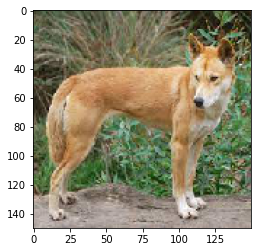

In [ ]:
plt.imshow(checklist[0][23])
los_lst[23],y_true[23]

(3.8479834, array([0., 0., 0., 0., 1., 0.], dtype=float32))

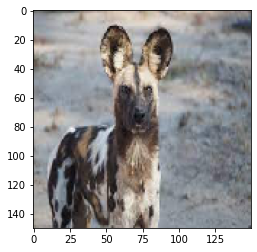

In [ ]:
plt.imshow(checklist[0][58])
los_lst[58],y_true[58]

(3.8377755, array([0., 0., 0., 0., 1., 0.], dtype=float32))

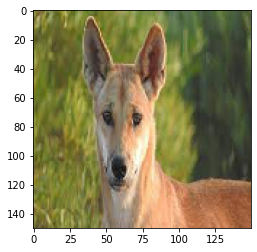

In [ ]:
plt.imshow(checklist[0][10])
los_lst[10],y_true[10]

(3.7651472, array([0., 0., 0., 0., 1., 0.], dtype=float32))

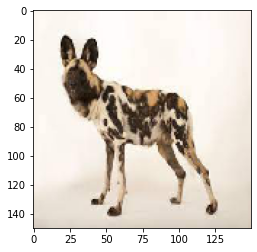

In [ ]:
plt.imshow(checklist[0][45])
los_lst[45],y_true[45]

(3.6795983, array([0., 0., 0., 0., 1., 0.], dtype=float32))

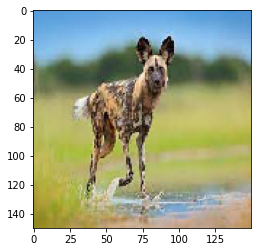

In [ ]:
plt.imshow(checklist[0][28])
los_lst[28],y_true[28]

In [ ]:
np.argsort(los_lst)[:5]

array([ 8, 39,  9, 48, 53])

(0.8562271, array([0., 1., 0., 0., 0., 0.], dtype=float32))

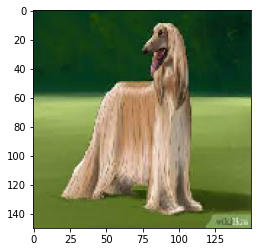

In [ ]:
plt.imshow(checklist[0][8])
los_lst[8],y_true[8]

(0.8616159, array([0., 1., 0., 0., 0., 0.], dtype=float32))

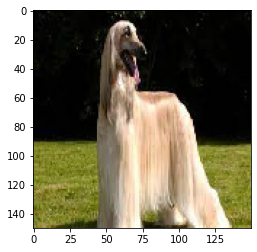

In [ ]:
plt.imshow(checklist[0][39])
los_lst[39],y_true[39]

(0.8796123, array([0., 1., 0., 0., 0., 0.], dtype=float32))

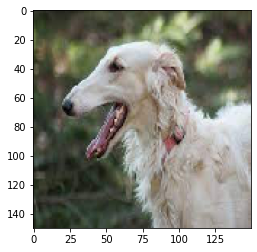

In [ ]:
plt.imshow(checklist[0][9])
los_lst[9],y_true[9]

(0.8854459, array([0., 1., 0., 0., 0., 0.], dtype=float32))

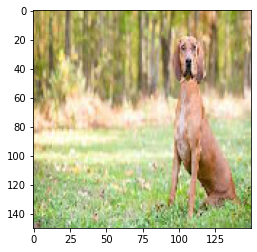

In [ ]:
plt.imshow(checklist[0][48])
los_lst[48],y_true[48]

(0.8923675, array([0., 1., 0., 0., 0., 0.], dtype=float32))

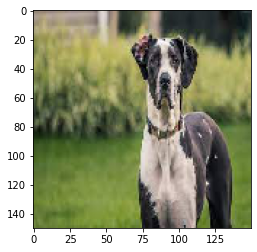

In [ ]:
plt.imshow(checklist[0][53])
los_lst[53],y_true[53]

In [ ]:
lst= []
start_v=0
for i in result_use:
  z=len(i)
  check_v=0
  check_p=0
  for j in range(z):
    if i[j] > check_v:
      check_p=j
      check_v=i[j]
  lst.append(check_p)

In [ ]:
np.argsort(lst)

array([ 0, 30, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 28, 29, 26,  1,  2,  3,  5,
        6,  8,  9, 10, 11, 12, 27, 15, 14, 17, 18, 19, 21, 22, 23, 25, 58,
       13, 38, 20,  7,  4, 24, 31, 16])

In [ ]:
np.argsort(lst)[:-21:-1]

array([16, 31, 24,  4,  7, 20, 38, 13, 58, 25, 23, 22, 21, 19, 18, 17, 14,
       15, 27, 12])

In [ ]:
lst[38]

5

(1.1885026, 5, array([0., 1., 0., 0., 0., 0.], dtype=float32))

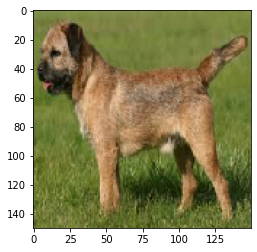

In [ ]:
plt.imshow(checklist[0][16])
los_lst[16],lst[16],y_true[16]

(1.1850238, 5, array([0., 0., 0., 0., 0., 1.], dtype=float32))

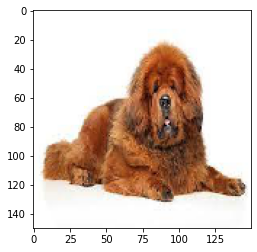

In [ ]:
plt.imshow(checklist[0][31])
los_lst[31],lst[31],y_true[31]

(1.1538833, 5, array([0., 0., 0., 0., 0., 1.], dtype=float32))

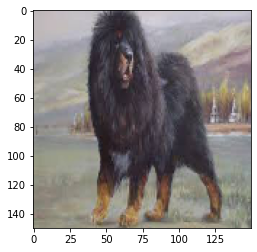

In [ ]:
plt.imshow(checklist[0][4])
los_lst[4],lst[4],y_true[4]

(2.0469608, 5, array([0., 0., 0., 1., 0., 0.], dtype=float32))

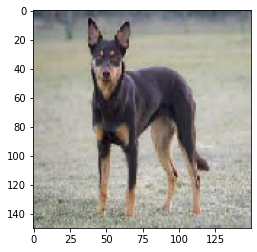

In [ ]:
plt.imshow(checklist[0][7])
los_lst[7],lst[7],y_true[7]

(1.1440024, 5, array([0., 0., 0., 0., 0., 1.], dtype=float32))

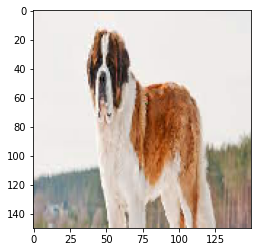

In [ ]:
plt.imshow(checklist[0][20])
los_lst[20],lst[20],y_true[20]

(2.0901766, 5, array([0., 0., 0., 1., 0., 0.], dtype=float32))

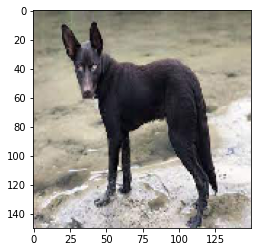

In [ ]:
plt.imshow(checklist[0][38])
los_lst[38],lst[38],y_true[38]

In [ ]:
plt.imshow(checklist[0][16])
los_lst[16],y_true[16]

1.0313207

In [ ]:
y_true

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0.

In [ ]:
result_use


array([[0.12727624, 0.34507003, 0.16080678, 0.10303408, 0.02052236,
        0.24329045],
       [0.12267538, 0.2985302 , 0.14622757, 0.12376492, 0.02241818,
        0.28638378],
       [0.11749402, 0.35365888, 0.16535844, 0.10345899, 0.01933898,
        0.24069072],
       [0.16508926, 0.40131563, 0.22580434, 0.06463683, 0.03289051,
        0.11026347],
       [0.12071275, 0.29077768, 0.12745483, 0.12686448, 0.01878078,
        0.31540954],
       [0.12854758, 0.40332788, 0.20353931, 0.0784215 , 0.02252685,
        0.16363685],
       [0.12555514, 0.35616285, 0.17410617, 0.10065956, 0.02309187,
        0.22042449],
       [0.11467358, 0.2902361 , 0.13522899, 0.12912677, 0.02033195,
        0.31040266],
       [0.14845246, 0.42476162, 0.20990513, 0.06500438, 0.02523521,
        0.12664115],
       [0.16433397, 0.4149437 , 0.24482134, 0.05005942, 0.02759491,
        0.09824656],
       [0.1400283 , 0.4272186 , 0.23518835, 0.05168596, 0.02154147,
        0.12433726],
       [0.17231455, 0

In [ ]:
from sklearn.metrics import confusion_matrix
matrix_t = confusion_matrix(lst_y,lst)
matrix_t

array([[ 0,  5,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  1],
       [ 0,  7,  0,  0,  0,  1],
       [ 0,  7,  0,  0,  0,  2],
       [ 0,  9,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  4]])

In [ ]:
confusion_matrix(lst_y,lst).ravel()

array([ 0,  5,  0,  0,  0,  0,  0, 12,  0,  0,  0,  1,  0,  7,  0,  0,  0,
        1,  0,  7,  0,  0,  0,  2,  0,  9,  0,  0,  0,  0,  0, 11,  0,  0,
        0,  4])

In [ ]:
lst_y= []
start_v=0
for i in y_true:
  z=len(i)
  check_v=0
  check_p=0
  for j in range(z):
    if i[j] > check_v:
      check_p=j
      check_v=i[j]
  lst_y.append(check_p)

In [ ]:
lst2= []

In [ ]:
for i,j in result_use,lst:
  if i==j:
    lst2.append('T')
  else:
    lst2.append('F')


ValueError: ignored

In [ ]:
result_use


array([[0.1323958 , 0.35588127, 0.16898055, 0.08441216, 0.0358713 ,
        0.22245878],
       [0.13239068, 0.35607907, 0.1688247 , 0.08439557, 0.03582918,
        0.22248082],
       [0.13233635, 0.3561155 , 0.16889818, 0.08431587, 0.03578902,
        0.22254497],
       [0.13221587, 0.3567133 , 0.16876516, 0.08409462, 0.03559572,
        0.22261545],
       [0.13240829, 0.35590506, 0.16894451, 0.08433252, 0.03582607,
        0.22258353],
       [0.13230108, 0.356152  , 0.16895498, 0.08425202, 0.03576967,
        0.22257023],
       [0.13226105, 0.35626504, 0.16893141, 0.08420341, 0.03570839,
        0.22263068],
       [0.13242741, 0.35589594, 0.16895245, 0.08437646, 0.03583373,
        0.222514  ],
       [0.13213351, 0.35653573, 0.16884767, 0.08417995, 0.03562494,
        0.22267817],
       [0.13253172, 0.35537395, 0.16900781, 0.08459493, 0.03603122,
        0.22246036],
       [0.1326219 , 0.35510883, 0.16905344, 0.08467899, 0.03609563,
        0.22244114],
       [0.13238563, 0